In [1]:
# 경고(warning) 비표시 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 교재 3장, (교재 p6,68 제외 by code error)
## 제가 운영하는 스포츠센터는 트레이닝 붐 덕분에 지금까지 고객 수가 늘었습니다. 
## 그런데 최근 1년간 고객 수가 늘지 않는 것 같습니다. 
## 자주 이용하는 고객은 계속 오지만, 가끔 오는 고객은 어느새 오지 않는 경우도 생기는 것 같습니다. 
## 제대로 데이터를 분석한 적이 없어서 어떤 고객이 계속 이용하고 있는지조차 모릅니다. 
## 데이터분석을 하면 뭔가 알 수 있을까요?
## 2018.4 ~ 2019.3 까지의 1년 Data

## 이용 이력 데이터 집계
## 정기 이용 플래그 작성
## 고객 데이터와 이용 이력 데이터 결합
## 회원 기간 계산
## 각종 통계량 파악
## 탈퇴 회원과 지속 회원의 차이를 파악

# use_log.csv : 이용이력, 기간은 2018.04~2019.03
# customer_master2.csv : 2019년 3월 말 시점의 회원 데이터 (이전 탈퇴 회원 포함)
# class_master.csv : 회원 구분 데이터(종일, 주간, 야간)
# campaign_master.csv : 행사 구분 데이터(입회비 유무 등)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='malgun gothic')
plt.rcParams['axes.unicode_minus'] = False

In [4]:
uselog = pd.read_csv('Data/use_log_1.csv')
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [5]:
customer = pd.read_csv('Data/customer_master2_1.csv')
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [6]:
class_master = pd.read_csv('Data/class_master_1.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [7]:
campaign_master = pd.read_csv('Data/campaign_master_1.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


### 고겍 Data 가공

In [8]:
customer_join1 =  pd.merge(customer, class_master, on = 'class', how = 'left')
customer_join1.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000


In [9]:
print(len(customer_join1))

4192


In [10]:
customer_join2 =  pd.merge(customer_join1, campaign_master, on = 'campaign_id', how = 'left')
customer_join2.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [11]:
print(len(customer_join2))

4192


In [12]:
customer_join2.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [13]:
customer_join2.groupby('class_name').count()['customer_id']

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [14]:
customer_join2.groupby('campaign_id').count()['customer_id']

campaign_id
CA1    3050
CA2     650
CA3     492
Name: customer_id, dtype: int64

In [15]:
customer_join2.groupby('gender').count()['customer_id']

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [16]:
customer_join2.groupby('is_deleted').count()['customer_id']

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [17]:
customer_join2.groupby('class_name').count()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,price,campaign_name
class_name,,,,,,,,,,
0_종일,2045,2045,2045,2045,2045,664,2045,2045,2045,2045
1_주간,1019,1019,1019,1019,1019,344,1019,1019,1019,1019
2_야간,1128,1128,1128,1128,1128,342,1128,1128,1128,1128


In [18]:
customer_join2.groupby('class_name').sum()[['is_deleted','price']]

,is_deleted,price
class_name,,
0_종일,664,21472500
1_주간,344,7642500
2_야간,342,6768000


In [19]:
customer_join2.groupby('campaign_name').count()['customer_id']

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

### 최근 Data 집계

In [20]:
customer_join2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    4192 non-null   object
 1   name           4192 non-null   object
 2   class          4192 non-null   object
 3   gender         4192 non-null   object
 4   start_date     4192 non-null   object
 5   end_date       1350 non-null   object
 6   campaign_id    4192 non-null   object
 7   is_deleted     4192 non-null   int64 
 8   class_name     4192 non-null   object
 9   price          4192 non-null   int64 
 10  campaign_name  4192 non-null   object
dtypes: int64(2), object(9)
memory usage: 360.4+ KB


In [21]:
###현재이용중인 회원

customer_join2['end_date'] = pd.to_datetime(customer_join2['end_date'])

In [22]:
customer_new = customer_join2.loc[(customer_join2['end_date']>= pd.to_datetime('20190331')) | (customer_join2['end_date'].isna())]

In [23]:
print(len(customer_new))

2953


In [24]:
customer_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2953 entries, 0 to 4191
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    2953 non-null   object        
 1   name           2953 non-null   object        
 2   class          2953 non-null   object        
 3   gender         2953 non-null   object        
 4   start_date     2953 non-null   object        
 5   end_date       111 non-null    datetime64[ns]
 6   campaign_id    2953 non-null   object        
 7   is_deleted     2953 non-null   int64         
 8   class_name     2953 non-null   object        
 9   price          2953 non-null   int64         
 10  campaign_name  2953 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 276.8+ KB


In [25]:
customer_new['end_date'].unique()

<DatetimeArray>
['NaT', '2019-03-31 00:00:00']
Length: 2, dtype: datetime64[ns]

In [26]:
customer_new.groupby('class_name').count()['customer_id']

class_name
0_종일    1444
1_주간     696
2_야간     813
Name: customer_id, dtype: int64

In [27]:
customer_new.groupby('campaign_name').count()['customer_id']

campaign_name
0_입회비반액할인     311
1_입회비무료       242
2_일반         2400
Name: customer_id, dtype: int64

In [28]:
customer_new.groupby('gender').count()['customer_id']

gender
F    1400
M    1553
Name: customer_id, dtype: int64

In [29]:
customer_new.groupby('is_deleted').count()['customer_id']

is_deleted
0    2842
1     111
Name: customer_id, dtype: int64

###이용이력 Data 집계

In [30]:
uselog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   log_id       197428 non-null  object
 1   customer_id  197428 non-null  object
 2   usedate      197428 non-null  object
dtypes: object(3)
memory usage: 4.5+ MB


In [31]:
uselog['usedate'] = pd.to_datetime(uselog['usedate'])

In [32]:
uselog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   log_id       197428 non-null  object        
 1   customer_id  197428 non-null  object        
 2   usedate      197428 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 4.5+ MB


In [33]:
uselog['년월']  = uselog['usedate'].dt.strftime('%Y%m')

In [34]:
uselog.head()

,log_id,customer_id,usedate,년월
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804


In [35]:
uselog.groupby('년월').count()[['customer_id','log_id']]

,customer_id,log_id
년월,,
201804,16460,16460
201805,16913,16913
201806,16994,16994
201807,16954,16954
201808,16674,16674
201809,16471,16471
201810,15989,15989
201811,15697,15697
201812,16383,16383


In [36]:
uselog_months = uselog.groupby(['년월', 'customer_id']).count()
uselog_months

log_id  usedate
년월     customer_id                 
201804 AS002855          4        4
       AS009013          2        2
       AS009373          3        3
       AS015315          6        6
       AS015739          7        7
...                    ...      ...
201903 TS995853          8        8
       TS998593          8        8
       TS999079          3        3
       TS999231          6        6
       TS999855          4        4

[36842 rows x 2 columns]

In [37]:
uselog_months = uselog.groupby(['년월', 'customer_id'], as_index=False).count()
uselog_months

,년월,customer_id,log_id,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7
...,...,...,...,...
36837,201903,TS995853,8,8
36838,201903,TS998593,8,8
36839,201903,TS999079,3,3
36840,201903,TS999231,6,6


In [38]:
uselog_months.rename(columns={'log_id':'count'}, inplace = True ) #열이름변경
del uselog_months['usedate'] #열 삭제
uselog_months

,년월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [39]:
uselog_customer = uselog_months.groupby('customer_id').agg(['mean','median','max','min'])['count']

In [40]:
uselog_customer

,mean,median,max,min
customer_id,,,,
AS002855,4.500000,5.0,7,2
AS008805,4.000000,4.0,8,1
AS009013,2.000000,2.0,2,2
AS009373,5.083333,5.0,7,3
AS015233,7.545455,7.0,11,4
...,...,...,...,...
TS995853,9.500000,9.5,11,8
TS998593,8.142857,8.0,9,7
TS999079,4.916667,5.5,9,2


In [41]:
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4
...,...,...,...,...,...
4187,TS995853,9.500000,9.5,11,8
4188,TS998593,8.142857,8.0,9,7
4189,TS999079,4.916667,5.5,9,2
4190,TS999231,4.666667,5.0,8,1


In [42]:
## 이용이력 Data로 정기이용 여부 플래그 작성

uselog['weekday'] = uselog['usedate'].dt.weekday
uselog # 월 ~ 일 0~ 6

,log_id,customer_id,usedate,년월,weekday
0,L00000049012330,AS009373,2018-04-01,201804,6
1,L00000049012331,AS015315,2018-04-01,201804,6
2,L00000049012332,AS040841,2018-04-01,201804,6
3,L00000049012333,AS046594,2018-04-01,201804,6
4,L00000049012334,AS073285,2018-04-01,201804,6
...,...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,201903,6
197424,L00000049209754,TS979550,2019-03-31,201903,6
197425,L00000049209755,TS995299,2019-03-31,201903,6
197426,L00000049209756,TS995853,2019-03-31,201903,6


In [43]:
uselog_weekday = uselog.groupby(['customer_id','년월','weekday'],
                                as_index = False).count()[['customer_id','년월','weekday','log_id']]

In [44]:
uselog_weekday.rename(columns={'log_id':'count'}, inplace = True )
uselog_weekday

,customer_id,년월,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
...,...,...,...,...
93328,TS999855,201901,1,1
93329,TS999855,201901,5,4
93330,TS999855,201901,6,1
93331,TS999855,201902,5,4


In [45]:
uselog_weekday = uselog_weekday.groupby('customer_id', as_index = False).max()[['customer_id', 'count']]
uselog_weekday

,customer_id,count
0,AS002855,5
1,AS008805,4
2,AS009013,2
3,AS009373,5
4,AS015233,5
...,...,...
4187,TS995853,5
4188,TS998593,5
4189,TS999079,5
4190,TS999231,5


In [46]:
uselog_weekday['routine_flg'] = 0

In [47]:
uselog_weekday["routine_flg"] = uselog_weekday["routine_flg"].\
                                            where(uselog_weekday["count"]<4, 1)
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


### 고객 이용Data 와 이용이력Data의 결합

In [50]:
customer_join3 =  pd.merge(customer_join2, uselog_customer, on = 'customer_id', how = 'left')
customer_join3.head(2)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3


In [72]:
customer_join4 =  pd.merge(customer_join3, uselog_weekday[['customer_id','routine_flg']], on = 'customer_id', how = 'left')
customer_join4.head(3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1


In [73]:
customer_join4['start_date']  = pd.to_datetime(customer_join4['start_date'])
customer_join4.head(3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1


In [74]:
customer_join4.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

### 회원 기간 계산

In [75]:
from dateutil.relativedelta import relativedelta #날자 비교함수

In [76]:
a = relativedelta(pd.to_datetime('2023-12-08'), pd.to_datetime('2000-12-13'))
a

relativedelta(years=+22, months=+11, days=+25)

In [77]:
customer_join4['calc_date'] = customer_join4['end_date']
customer_join4.head(2)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,NaT
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,NaT


In [78]:
customer_join4['calc_date'] = customer_join4['calc_date'].fillna(pd.to_datetime('20190430'))
customer_join4.head(3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30


In [79]:
customer_join4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    4192 non-null   object        
 1   name           4192 non-null   object        
 2   class          4192 non-null   object        
 3   gender         4192 non-null   object        
 4   start_date     4192 non-null   datetime64[ns]
 5   end_date       1350 non-null   datetime64[ns]
 6   campaign_id    4192 non-null   object        
 7   is_deleted     4192 non-null   int64         
 8   class_name     4192 non-null   object        
 9   price          4192 non-null   int64         
 10  campaign_name  4192 non-null   object        
 11  mean           4192 non-null   float64       
 12  median         4192 non-null   float64       
 13  max            4192 non-null   int64         
 14  min            4192 non-null   int64         
 15  routine_flg    4192 n

In [80]:
customer_join4['membership'] = 0

In [81]:
customer_join4.head(2)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,0
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,0


In [82]:
for i in range(len(customer_join4)):
    delta = relativedelta(customer_join4['calc_date'].iloc[i], customer_join4['start_date'].iloc[i])
    customer_join4['membership'].iloc[i] = delta

customer_join4.head(2)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,"relativedelta(years=+3, months=+11, days=+29)"
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,"relativedelta(years=+3, months=+11, days=+29)"


In [83]:
for i in range(len(customer_join4)):
    delta = relativedelta(customer_join4['calc_date'].iloc[i], customer_join4['start_date'].iloc[i])
    customer_join4['membership'].iloc[i] = delta.years*12 + delta.months
    
customer_join4.head(2)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47


In [84]:
customer_join4[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [85]:
customer_join4.groupby('routine_flg').count()['customer_id']

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

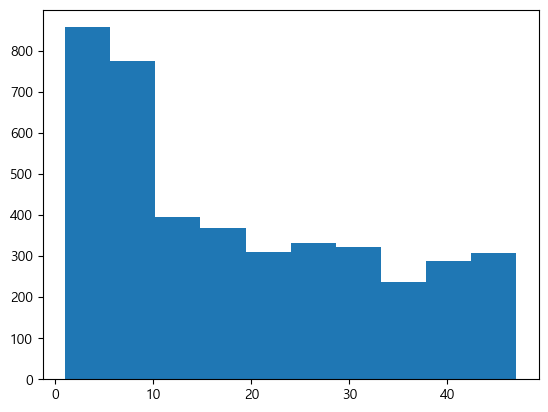

In [86]:
import matplotlib.pyplot as plt
plt.hist(customer_join4['membership'])

In [89]:
customer_end = customer_join4.loc[customer_join4['is_deleted'] == 1 ]
customer_end.describe()

,start_date,end_date,is_deleted,price,mean,median,max,min,routine_flg,calc_date
count,1350,1350,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350
mean,2018-01-20 10:45:20,2018-10-17 16:23:28,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,2018-10-17 16:23:28
min,2016-05-01 00:00:00,2018-04-30 00:00:00,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2018-04-30 00:00:00
25%,2017-10-01 00:00:00,2018-06-30 00:00:00,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,2018-06-30 00:00:00
50%,2018-03-01 00:00:00,2018-10-31 00:00:00,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,2018-10-31 00:00:00
75%,2018-06-03 00:00:00,2019-01-31 00:00:00,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,2019-01-31 00:00:00
max,2019-02-11 00:00:00,2019-03-31 00:00:00,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,2019-03-31 00:00:00
std,NaN,NaN,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,NaN


In [90]:
customer_stay = customer_join4.loc[customer_join4['is_deleted'] == 0 ]
customer_stay.describe()

,start_date,end_date,is_deleted,price,mean,median,max,min,routine_flg,calc_date
count,2842,0,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842
mean,2017-04-03 22:42:28.627726848,NaT,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,2019-04-30 00:00:00
min,2015-05-01 00:00:00,NaT,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,2019-04-30 00:00:00
25%,2016-05-01 00:00:00,NaT,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,2019-04-30 00:00:00
50%,2017-04-01 00:00:00,NaT,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,2019-04-30 00:00:00
75%,2018-04-05 00:00:00,NaT,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,2019-04-30 00:00:00
max,2019-03-15 00:00:00,NaT,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,2019-04-30 00:00:00
std,NaN,NaN,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,NaN


In [91]:
## 탈퇴회원의 평균, 중앙, 최대, 최소값은 모두 지속 회원보다 작음을 알 수 있다.
##  특히, 평균과 중앙값은 큰 차이가 있음.
##  매월 최대 이용 횟수의 평균값은 지속 회원이 높다.
##  routine_flg 의 평균값은 차이가 크게 나서, 지속회원은 0.95로 많은 회원이 정기적으로 이용하고 있다는 것을 알 수 있음.
##  반면, 탈퇴 회원은 0.45로 거의 절반은 랜덤하게 이용하고 있다고 판단됨.

In [92]:
customer_join4.to_csv("Data/customer_join4.csv", index=False,  encoding='utf-8-sig')